In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import project_credentials as pc 
import mysql.connector


In [2]:
# Verbindung zur mysql-Datenbank
connection = mysql.connector.connect(
    host=pc.my_sql_host,
    database='scm_data_database',
    user=pc.my_sql_user,
    password=pc.my_sql_password
    )

In [3]:
inventory_data_query = "SELECT product_id, warehouse_inventory, inventory_date, inventory_cost_per_unit, (warehouse_inventory*inventory_cost_per_unit) as absolute_inventory_cost, year(inventory_date) as year, month(inventory_date) as month FROM warehouse_inventory"
inventory_data = pd.read_sql(inventory_data_query, connection)
inventory_data.head()

C:\Users\meier\AppData\Local\Temp\ipykernel_13948\1431244062.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  inventory_data = pd.read_sql(inventory_data_query, connection)


,product_id,warehouse_inventory,inventory_date,inventory_cost_per_unit,absolute_inventory_cost,year,month
0,1,254,2015-01-01,0.49,124.46,2015,1
1,1,675,2015-02-01,0.48,324.00,2015,2
2,1,542,2015-03-01,1.46,791.32,2015,3
3,1,633,2015-04-01,1.23,778.59,2015,4
4,1,624,2015-05-01,0.73,455.52,2015,5


In [4]:
order_data_query = "SELECT oi.product_id, year(ot.order_date) as year, month(ot.order_date) as month, SUM(oi.order_quantity) as order_quantity, SUM(profit) as profit, SUM(gross_sales) as gross_sales, AVG(discount_percentage) as average_discount_percentage, AVG(DATEDIFF(ot.shipment_date, ot.order_date)) as average_fulfillment_days FROM order_item oi JOIN orders ot ON oi.order_id = ot.order_id GROUP BY oi.product_id, year, month ORDER BY oi.Product_ID, year, month"
order_data = pd.read_sql(order_data_query, connection)
order_data.head()

C:\Users\meier\AppData\Local\Temp\ipykernel_13948\476037326.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  order_data = pd.read_sql(order_data_query, connection)


,product_id,year,month,order_quantity,profit,gross_sales,average_discount_percentage,average_fulfillment_days
0,1,2015,1,456.0,22197.0,27360.0,0.099470,103.3444
1,1,2015,2,378.0,17640.0,22680.0,0.106333,70.7667
2,1,2015,3,442.0,20580.0,26520.0,0.091571,78.7143
3,1,2015,4,403.0,19698.0,24180.0,0.107463,83.2313
4,1,2015,5,330.0,16023.0,19800.0,0.103211,55.9450


In [5]:
# Beide Tabellen joinen anhand product_id, year und month mit Left-Join
inventory_data = pd.merge(inventory_data, order_data, on=['product_id', 'year', 'month'], how='left')
inventory_data.head()


,product_id,warehouse_inventory,inventory_date,inventory_cost_per_unit,absolute_inventory_cost,year,month,order_quantity,profit,gross_sales,average_discount_percentage,average_fulfillment_days
0,1,254,2015-01-01,0.49,124.46,2015,1,456.0,22197.0,27360.0,0.099470,103.3444
1,1,675,2015-02-01,0.48,324.00,2015,2,378.0,17640.0,22680.0,0.106333,70.7667
2,1,542,2015-03-01,1.46,791.32,2015,3,442.0,20580.0,26520.0,0.091571,78.7143
3,1,633,2015-04-01,1.23,778.59,2015,4,403.0,19698.0,24180.0,0.107463,83.2313
4,1,624,2015-05-01,0.73,455.52,2015,5,330.0,16023.0,19800.0,0.103211,55.9450


In [8]:
# Format des DataFrames ausgeben
print(inventory_data.shape)
print(inventory_data.columns)
print(inventory_data.dtypes)

(4200, 12)
Index(['product_id', 'warehouse_inventory', 'inventory_date',
       'inventory_cost_per_unit', 'absolute_inventory_cost', 'year', 'month',
       'order_quantity', 'profit', 'gross_sales',
       'average_discount_percentage', 'average_fulfillment_days'],
      dtype='object')
product_id                              int64
warehouse_inventory                   float64
inventory_date                 datetime64[ns]
inventory_cost_per_unit               float64
absolute_inventory_cost               float64
year                                    int64
month                                   int64
order_quantity                        float64
profit                                float64
gross_sales                           float64
average_discount_percentage           float64
average_fulfillment_days              float64
dtype: object


In [7]:
# Datentypen ändern

inventory_data["inventory_date"] = pd.to_datetime(inventory_data["inventory_date"], format="%Y%m")
inventory_data["warehouse_inventory"] = inventory_data["warehouse_inventory"].astype(float)

In [9]:
# Anzahl der Zeilen im DataFrame
num_rows1 = len(inventory_data)
print(f"Anzahl der Zeilen im DataFrame: {num_rows1}")

# Anzahl der NaN-Werte pro Spalte ermitteln in Order_Data
anzahl_nan_pro_spalte1 = inventory_data.isna().sum()

# Gesamtanzahl der NaN-Werte im gesamten DataFrame
gesamtanzahl_nan1 = inventory_data.isna().sum().sum()

print("Anzahl der NaN-Werte pro Spalte:")
print(anzahl_nan_pro_spalte1)

print("\nGesamtanzahl der NaN-Werte im DataFrame:")
print(gesamtanzahl_nan1)

Anzahl der Zeilen im DataFrame: 4200
Anzahl der NaN-Werte pro Spalte:
product_id                        0
warehouse_inventory               0
inventory_date                    0
inventory_cost_per_unit           0
absolute_inventory_cost           0
year                              0
month                             0
order_quantity                 2509
profit                         2509
gross_sales                    2509
average_discount_percentage    2509
average_fulfillment_days       2509
dtype: int64

Gesamtanzahl der NaN-Werte im DataFrame:
12545


In [9]:
# Fehlerhaft Zeilen bearbeiten

inventory_data['order_quantity'] = inventory_data['order_quantity'].fillna(0)
inventory_data['gross_sales'] = inventory_data['gross_sales'].fillna(0)
inventory_data['profit'] = inventory_data['profit'].fillna(0)
inventory_data['average_discount_percentage'] = inventory_data.groupby('year')['average_discount_percentage'].transform(lambda x: x.fillna(x.mean()))
inventory_data['average_fulfillment_days'] = inventory_data.groupby('year')['average_fulfillment_days'].transform(lambda x: x.fillna(x.mean()))

In [10]:
grouped_df = inventory_data.groupby(['year', 'month'])['warehouse_inventory'].sum().reset_index()
grouped_df.head()

,year,month,warehouse_inventory
0,2015,1,1913.0
1,2015,2,2213.0
2,2015,3,2233.0
3,2015,4,2540.0
4,2015,5,1985.0


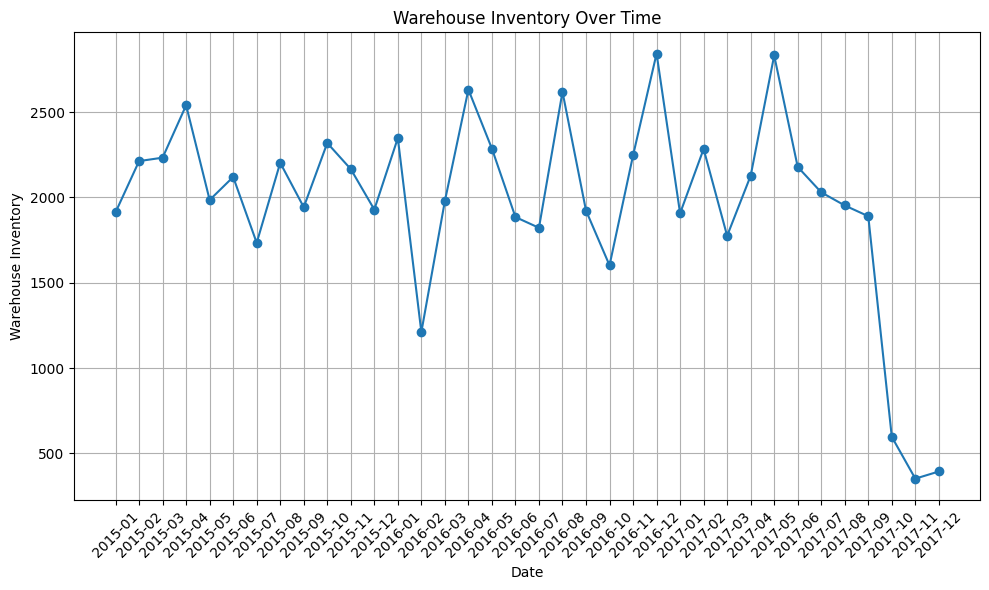

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_df.index, grouped_df['warehouse_inventory'], marker='o', linestyle='-')
plt.xticks(range(len(grouped_df)), [f"{year}-{month:02d}" for year, month in zip(grouped_df['year'], grouped_df['month'])], rotation=45)
plt.xlabel('Date')
plt.ylabel('Warehouse Inventory')
plt.title('Warehouse Inventory Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
correlation = inventory_data.corr()['warehouse_inventory']

print(correlation)

product_id                    -0.324238
warehouse_inventory            1.000000
inventory_date                -0.030458
inventory_cost_per_unit       -0.006999
absolute_inventory_cost        0.876808
year                          -0.023811
month                         -0.023501
order_quantity                 0.832849
profit                         0.718674
gross_sales                    0.599948
average_discount_percentage    0.001344
average_fulfillment_days      -0.013719
Name: warehouse_inventory, dtype: float64


In [13]:
# DataFrame für Zeitreihen-Analyse (Time Series Analysis = TSA)

tsa_df = pd.DataFrame()
tsa_df[["Date", "Inventory"]] = inventory_data[["inventory_date", "warehouse_inventory"]]
tsa_df.set_index("Date", inplace=True)
tsa_df.head()

,Inventory
Date,
2015-01-01,254.0
2015-02-01,675.0
2015-03-01,542.0
2015-04-01,633.0
2015-05-01,624.0


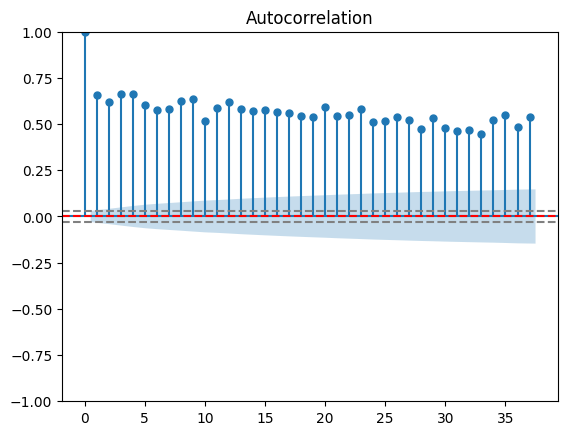

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(tsa_df['Inventory'])
plt.axhline(y=0, linestyle='--', color='red')  # Nulllinie
plt.axhline(y=-1.96/np.sqrt(len(tsa_df)), linestyle='--', color='gray')  # Untere Signifikanzgrenze
plt.axhline(y=1.96/np.sqrt(len(tsa_df)), linestyle='--', color='gray')  # Obere Signifikanzgrenze

plt.show()

In [17]:
from statsmodels.tsa.stattools import acf
acf_values = acf(tsa_df['Inventory'])
average_autocorrelation = sum(acf_values) / len(acf_values)
print("Durchschnittliche Autokorrelation:", average_autocorrelation)

Durchschnittliche Autokorrelation: 0.5691158146481679


In [18]:
grouped_df["Year_Month"] = grouped_df['year'].astype(str) + '-' + grouped_df['month'].astype(str)
grouped_df["Year_Month"] = pd.to_datetime(grouped_df["Year_Month"])
grouped_df.drop(["year", "month"], axis=1, inplace=True)
grouped_df.set_index("Year_Month", inplace=True)
grouped_df.head()


,warehouse_inventory
Year_Month,
2015-01-01,1913.0
2015-02-01,2213.0
2015-03-01,2233.0
2015-04-01,2540.0
2015-05-01,1985.0


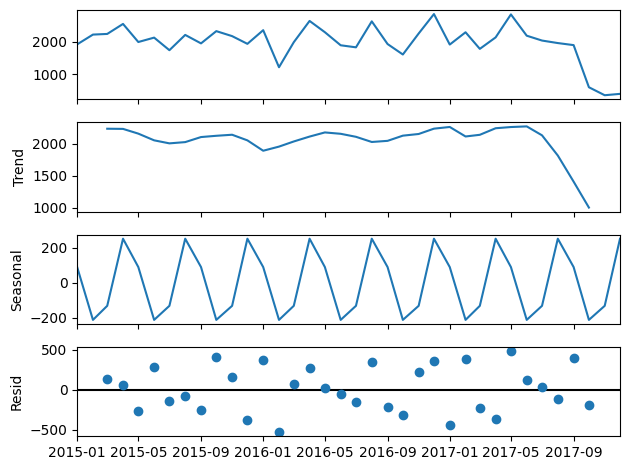

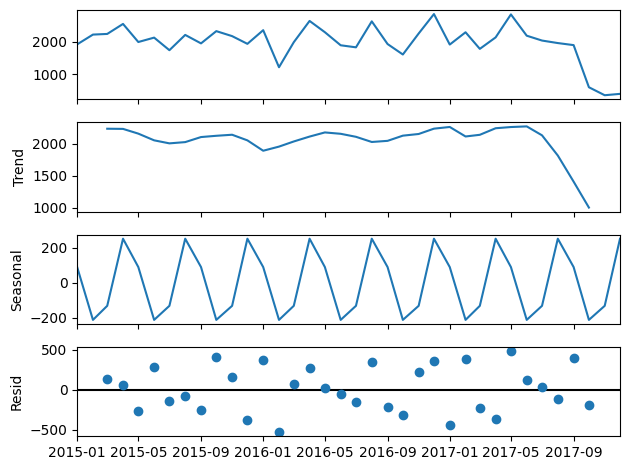

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(grouped_df, period=4)
decomp.plot()

In [20]:
inventory_data.to_csv("inventory_data.csv", index=True)

In [ ]:
# Nimm die Variablen mit der höchsten Korrelation und erzeuge ein Modell nur mit diesem einen Feature